In [341]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import numpy as np


In [197]:
data1 = pd.read_csv('../data/Turbine1.csv', sep=";")
data2 = pd.read_csv('../data/Turbine2.csv', sep=";")

## Answers

### <span style='color:Orange'> Ques1. Train any ML Model that predicts the power (single target) by a given windspeed (single feature). </span>
### Ans.  I have trained a linear regression model/ Decision Tree Regressor/ Random Forest Regressor

<br />

### <span style='color:Orange'> Ques2. Choose a good metric to measure the model performance. </span>
### Ans. I have tested model with R2 score, mean squared error, mean absolute deviation error. R2 score metric is one of the good metric to measure  the variance of the dependent variable (Liestung -: in our case). MSE and other are dependent on absolute values which sometimes can led to confusion.

<br />

### <span style='color:Orange'> Ques3. Explain why you chose this model architecture and what the limitations of this architecture might be. </span>
### Ans. I have used this model (regression based) because we have to predict continous variable using sensors data and wind data. Limitation is time information (timestamps) is not involved directly in the model.

<br />

### <span style='color:Orange'> Ques4. Try out additional sensors' data. How did the results change and why? </span>
### Ans. Results with linear regression changed significantly because there are other parameters such as rotor, Lager which is also impacting the power generated by the model.
### Additional sensors data which I have used: "Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", 'CosPh', 'Abgabe', 'Bezug', KH-Zähl1''KH-Zähl2', 'KH-DigiE','KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3'.
 ### I didn't use Storm and Spann because these are generated by the Wind Turbine similar to Power (in my understanding.)
 

### <span style='color:Orange'> Ques5. Based on this model, where would you suspect turbine anomalies? Please list time frames and visualize the anomalies. </span>
### Ans. Turbine Anomalies are occuring where the power value is too high or too low (-ve values).
### These anomalies are visualized in Data Analysis notebook.

### <span style='color:Blue'> Analyzed the feature importance for the model with multiple sensors data </span>

## Data Preparation

In [198]:
data1.rename(columns=lambda x: x.strip(), inplace=True)

In [199]:
data1.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4'],
      dtype='object')

In [200]:
data1["Dat/Zeit"] = data1["Dat/Zeit"].replace(',', '', regex=True)

In [201]:
data1["Dat/Zeit"] = data1["Dat/Zeit"].replace(',', '', regex=True)
data1["time"] = pd.to_datetime(data1["Dat/Zeit"], dayfirst=True, errors="coerce")
data1["date"]= data1["time"].dt.date
data1["hour"] = data1["time"].dt.hour
data1["weekday"] = data1["time"].dt.weekday
data1["min"] = data1["time"].dt.minute
data1["day"] = data1["time"].dt.day
data1["month"] = data1["time"].dt.month
data1["min"] = data1["time"].dt.minute

In [206]:
data_new_1 = data1.loc[1:, :]

In [207]:
data_new_1.sort_values(by=['time'], inplace=True)

C:\Users\ridgar1\AppData\Local\Temp\ipykernel_29192\2059965022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_1.sort_values(by=['time'], inplace=True)


In [208]:
data_new_1

,Dat/Zeit,Wind,Rotor,Leistung,Azimut,Prod. 1,Prod. 2,BtrStd 1,BtrStd 2,Gen1-,...,KH-Ana-2,KH-Ana-3,KH-Ana-4,time,date,hour,weekday,min,day,month
1,01.01.2016 00:10,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:10:00,2016-01-01,0.0,4.0,10.0,1.0,1.0
2,01.01.2016 00:20,"5,8",10,"268,5","161,4",31533151,5742941,48371,46008,"14,8",...,0,0,0,2016-01-01 00:20:00,2016-01-01,0.0,4.0,20.0,1.0,1.0
3,01.01.2016 00:30,"5,8",10,"272,1","160,6",31533151,5742983,48371,46008,"15,9",...,0,0,0,2016-01-01 00:30:00,2016-01-01,0.0,4.0,30.0,1.0,1.0
4,01.01.2016 00:40,"6,4",10,"320,1",162,31533151,5743039,48371,46008,"17,7",...,0,0,"0,,,,",2016-01-01 00:40:00,2016-01-01,0.0,4.0,40.0,1.0,1.0
5,01.01.2016 00:50,"6,9","14,5","457,4","161,1",31533206,5743049,48371,46008,20,...,0,0,"0,",2016-01-01 00:50:00,2016-01-01,0.0,4.0,50.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13099,31.03.2016 23:10,"5,2",10,"228,2","359,1",32300592,5866558,49430,46892,"16,2",...,0,0,"0,,,,,,",2016-03-31 23:10:00,2016-03-31,23.0,3.0,10.0,31.0,3.0
13100,31.03.2016 23:20,"5,3",10,"237,8","359,7",32300592,5866593,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:20:00,2016-03-31,23.0,3.0,20.0,31.0,3.0
13101,31.03.2016 23:30,"5,2",10,"209,9","0,3",32300592,5866632,49430,46892,17,...,0,0,"0,,,,",2016-03-31 23:30:00,2016-03-31,23.0,3.0,30.0,31.0,3.0
13102,31.03.2016 23:40,"5,2",10,"220,5",0,32300592,5866670,49430,46892,17,...,0,0,"0,,,,,",2016-03-31 23:40:00,2016-03-31,23.0,3.0,40.0,31.0,3.0


In [209]:
data_new_1.columns

Index(['Dat/Zeit', 'Wind', 'Rotor', 'Leistung', 'Azimut', 'Prod. 1', 'Prod. 2',
       'BtrStd 1', 'BtrStd 2', 'Gen1-', 'Lager', 'Außen', 'GetrT', 'Status',
       'Spann', 'Spann.1', 'Spann.2', 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE',
       'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', 'KH-Ana-4', 'time',
       'date', 'hour', 'weekday', 'min', 'day', 'month'],
      dtype='object')

In [212]:
data_new_1 = data_new_1.replace(',', '.', regex=True)

In [213]:
cols_list = ["Wind","Rotor", 'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", "Spann", "Spann.1", "Spann.2", 'Strom-', 'Strom-.1', 'Strom-.2',
       'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE', 'KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]
data_new_1[cols_list] = data_new_1[cols_list].apply(pd.to_numeric)

In [214]:
data_new_1.dtypes

Dat/Zeit            object
Wind               float64
Rotor              float64
Leistung           float64
Azimut             float64
Prod. 1              int64
Prod. 2              int64
BtrStd 1             int64
BtrStd 2             int64
Gen1-              float64
Lager              float64
Außen              float64
GetrT              float64
Status              object
Spann              float64
Spann.1            float64
Spann.2            float64
Strom-             float64
Strom-.1           float64
Strom-.2           float64
CosPh              float64
Abgabe               int64
Bezug                int64
KH-Zähl1             int64
KH-Zähl2             int64
KH-DigiE             int64
KH-DigiI             int64
KH-Ana-1             int64
KH-Ana-2             int64
KH-Ana-3             int64
KH-Ana-4            object
time        datetime64[ns]
date                object
hour               float64
weekday            float64
min                float64
day                float64
m

### Visualizing the data

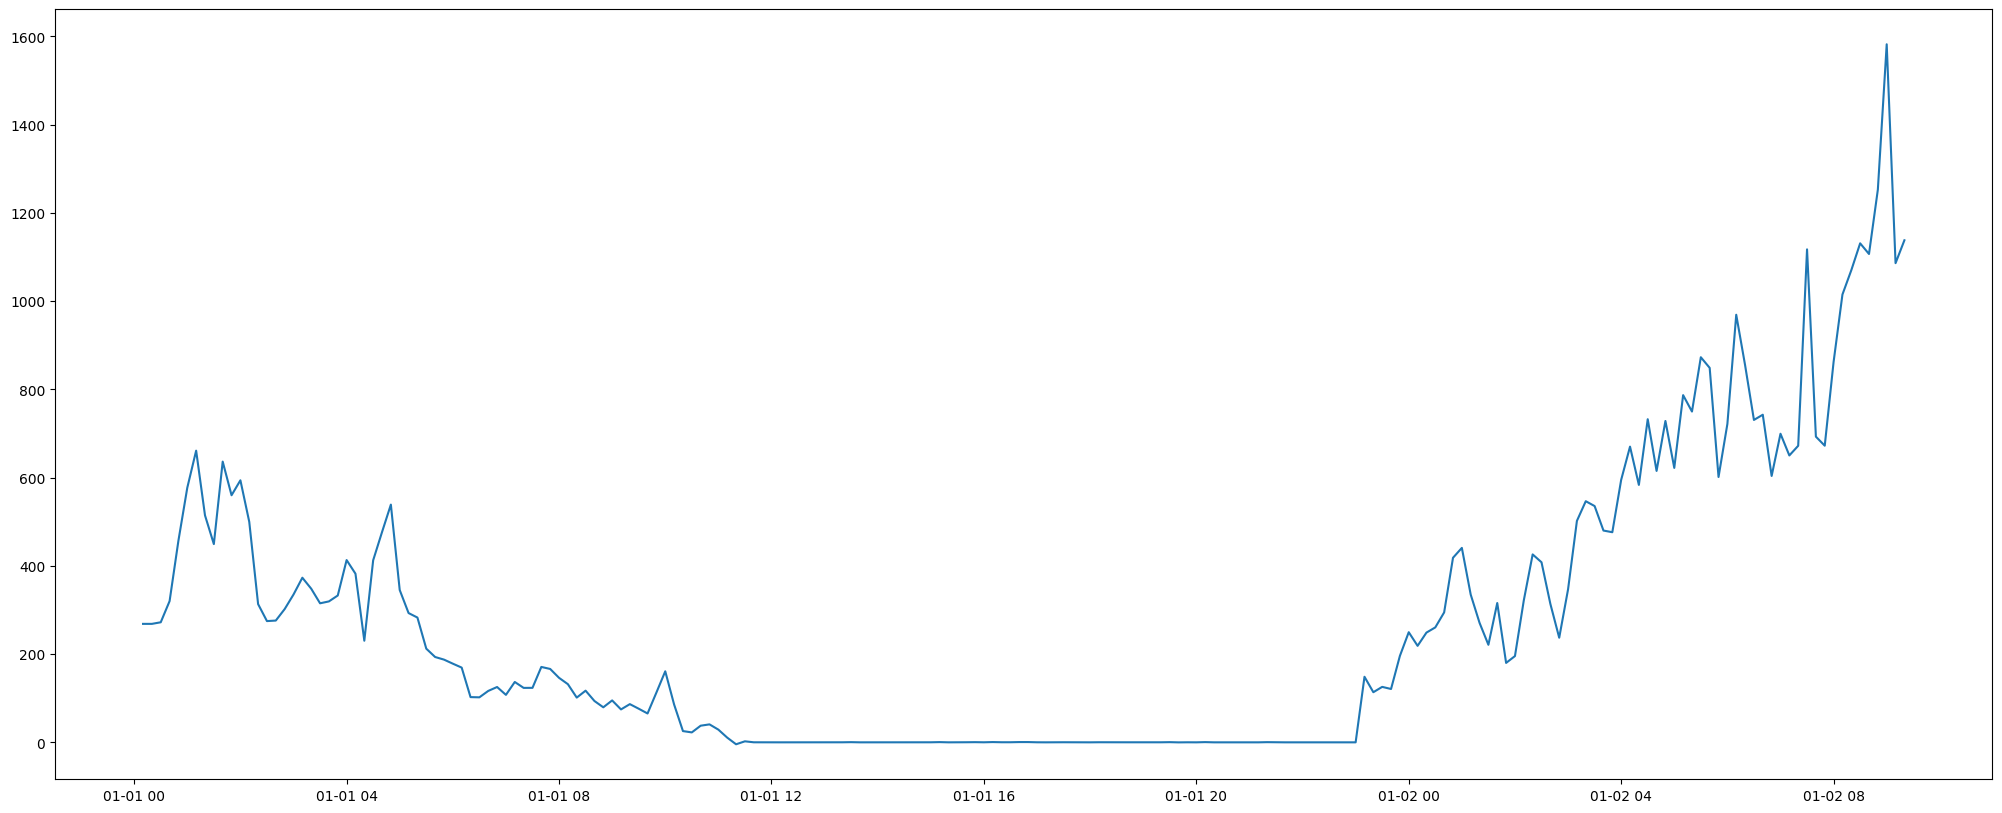

In [215]:
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][0:200], data_new_1["Leistung"][0:200])
plt.show()

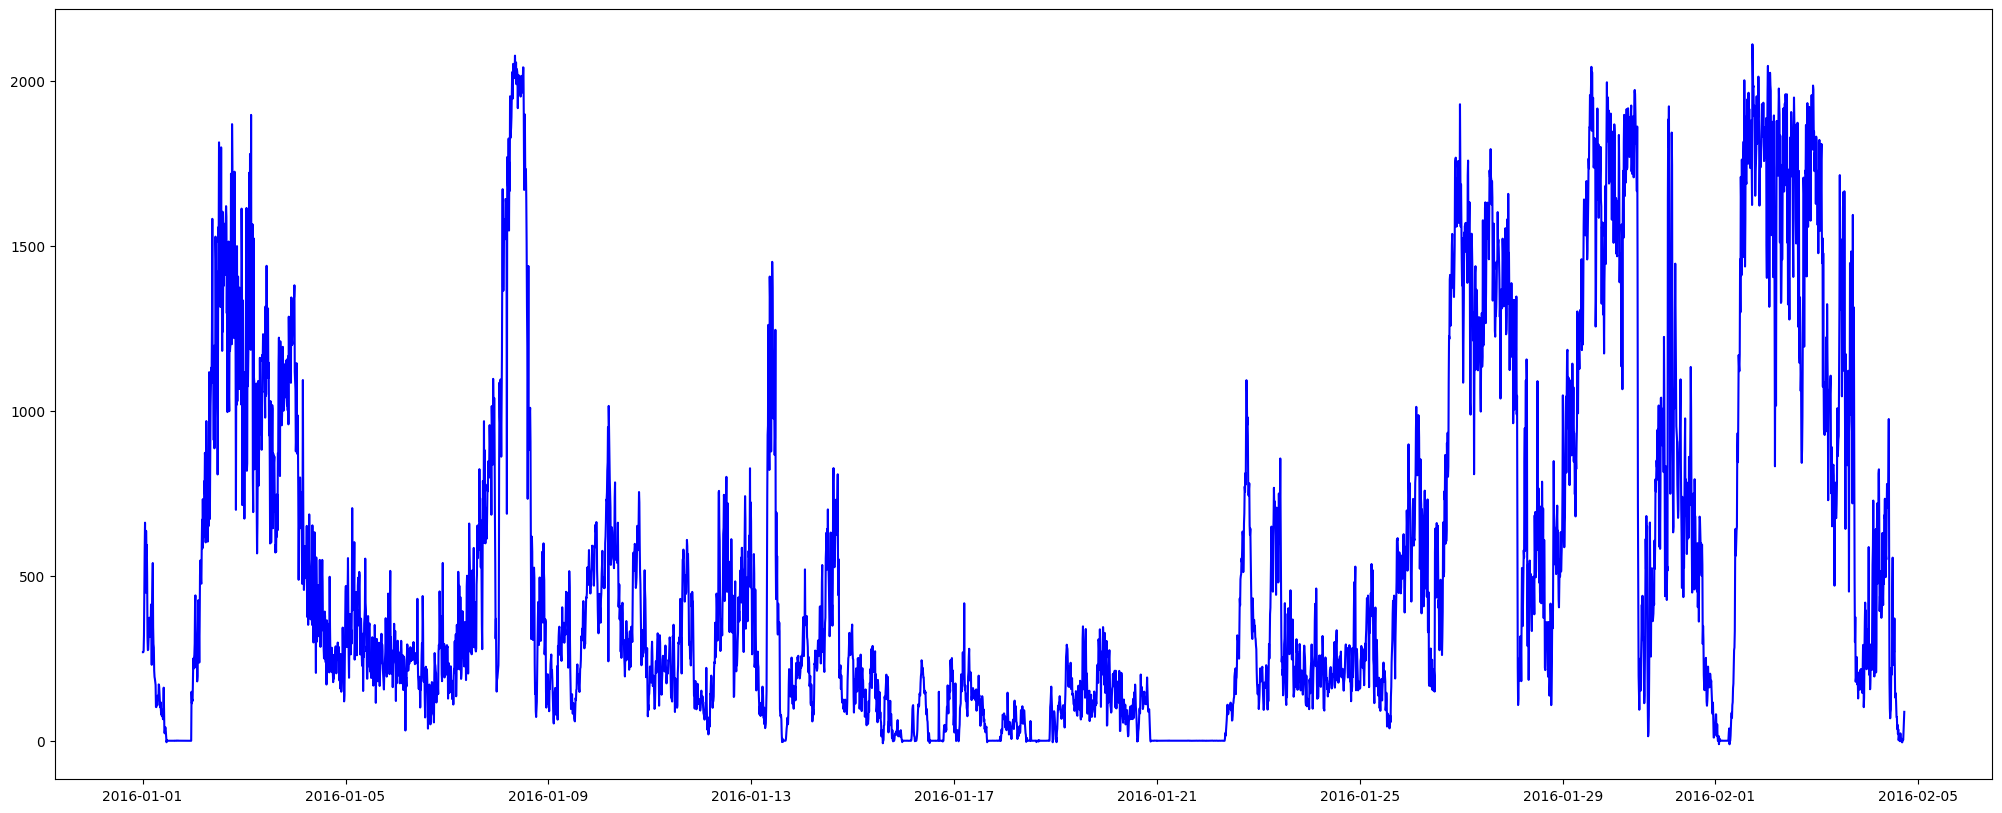

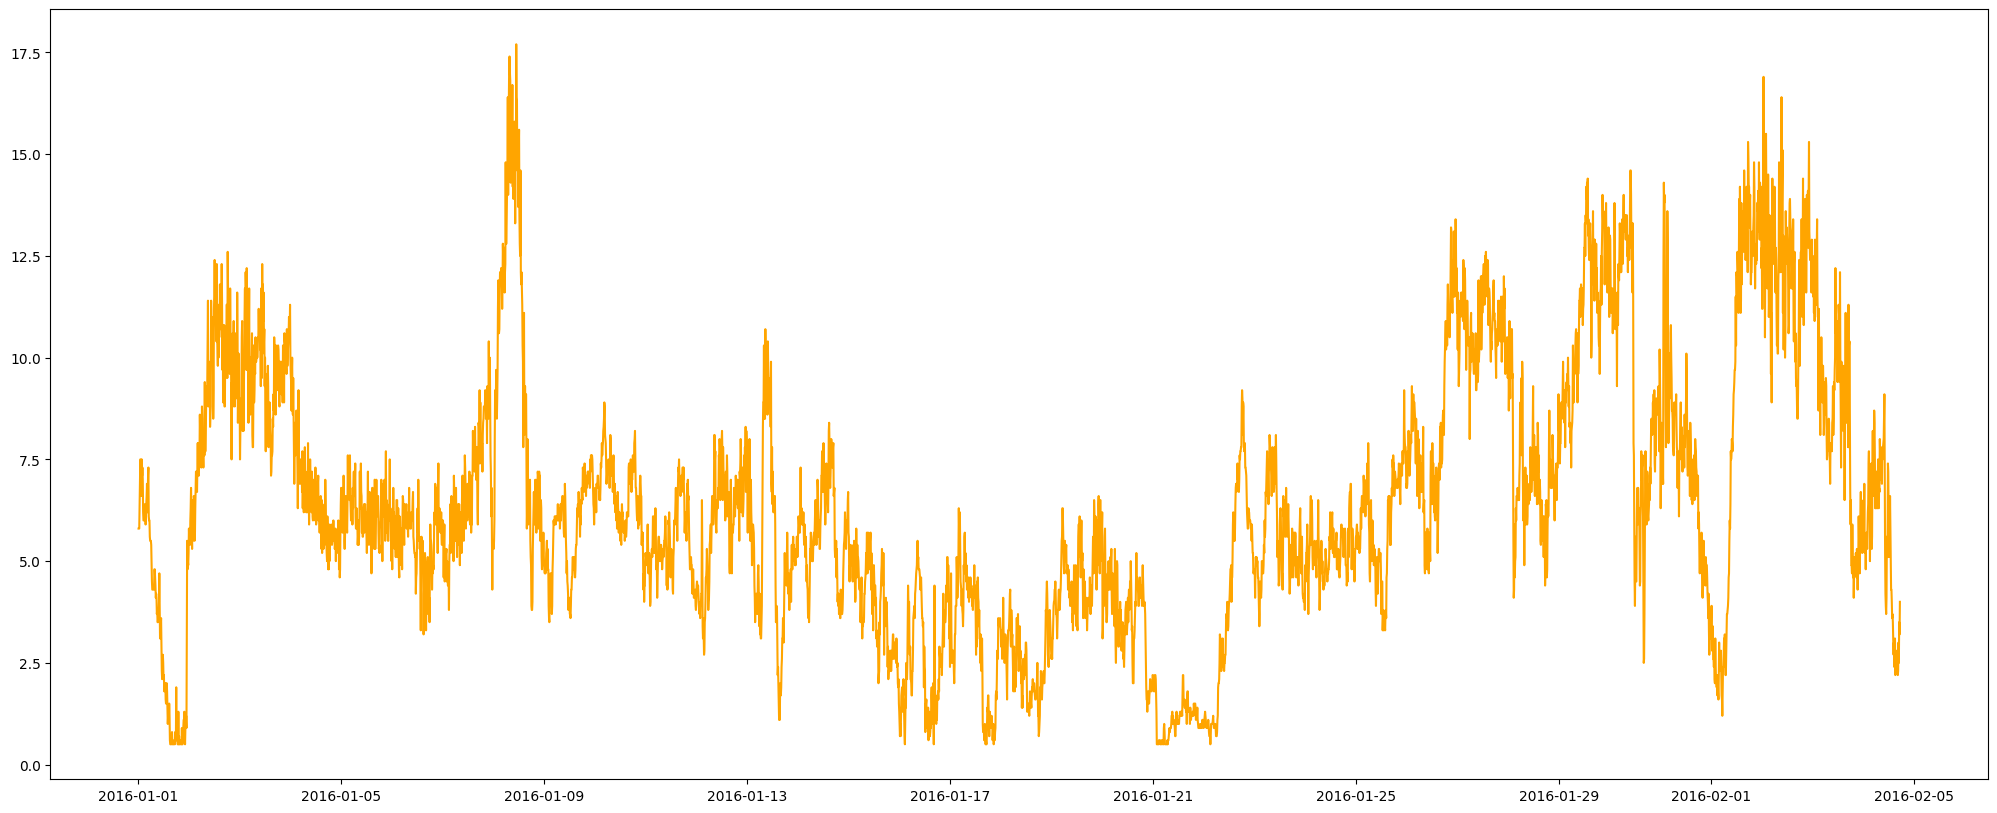

In [216]:
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][0:5000], data_new_1["Leistung"][0:5000], color="Blue")
plt.show()
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][0:5000], data_new_1["Wind"][0:5000], color="orange")


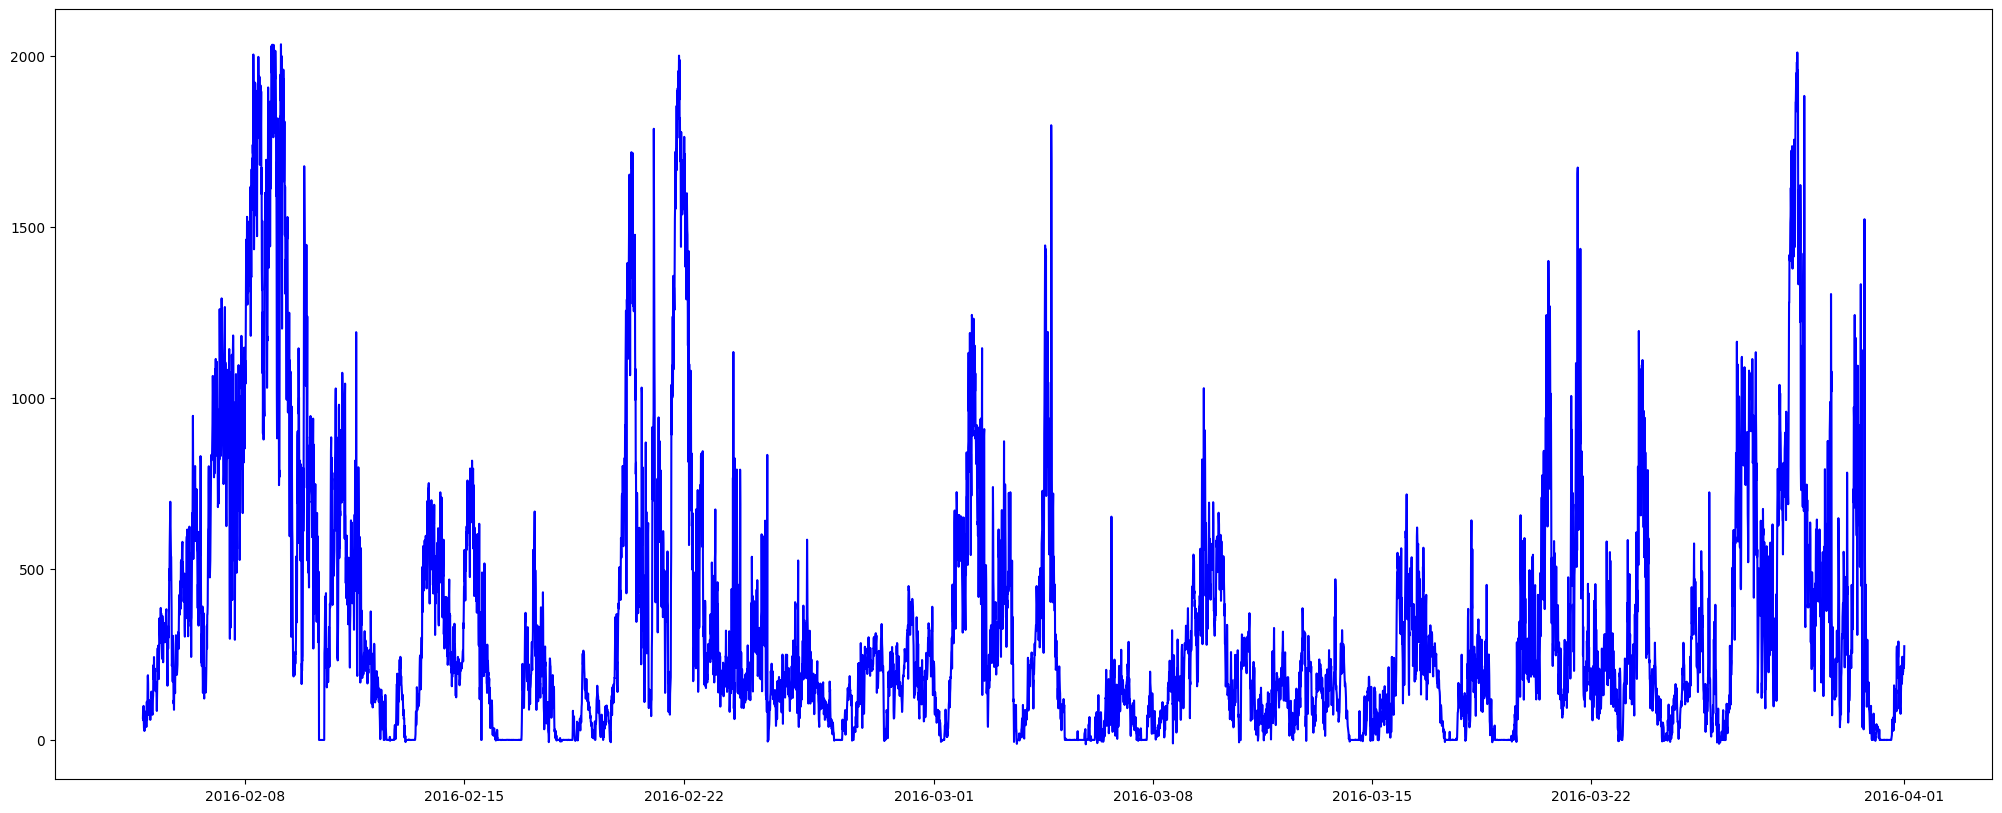

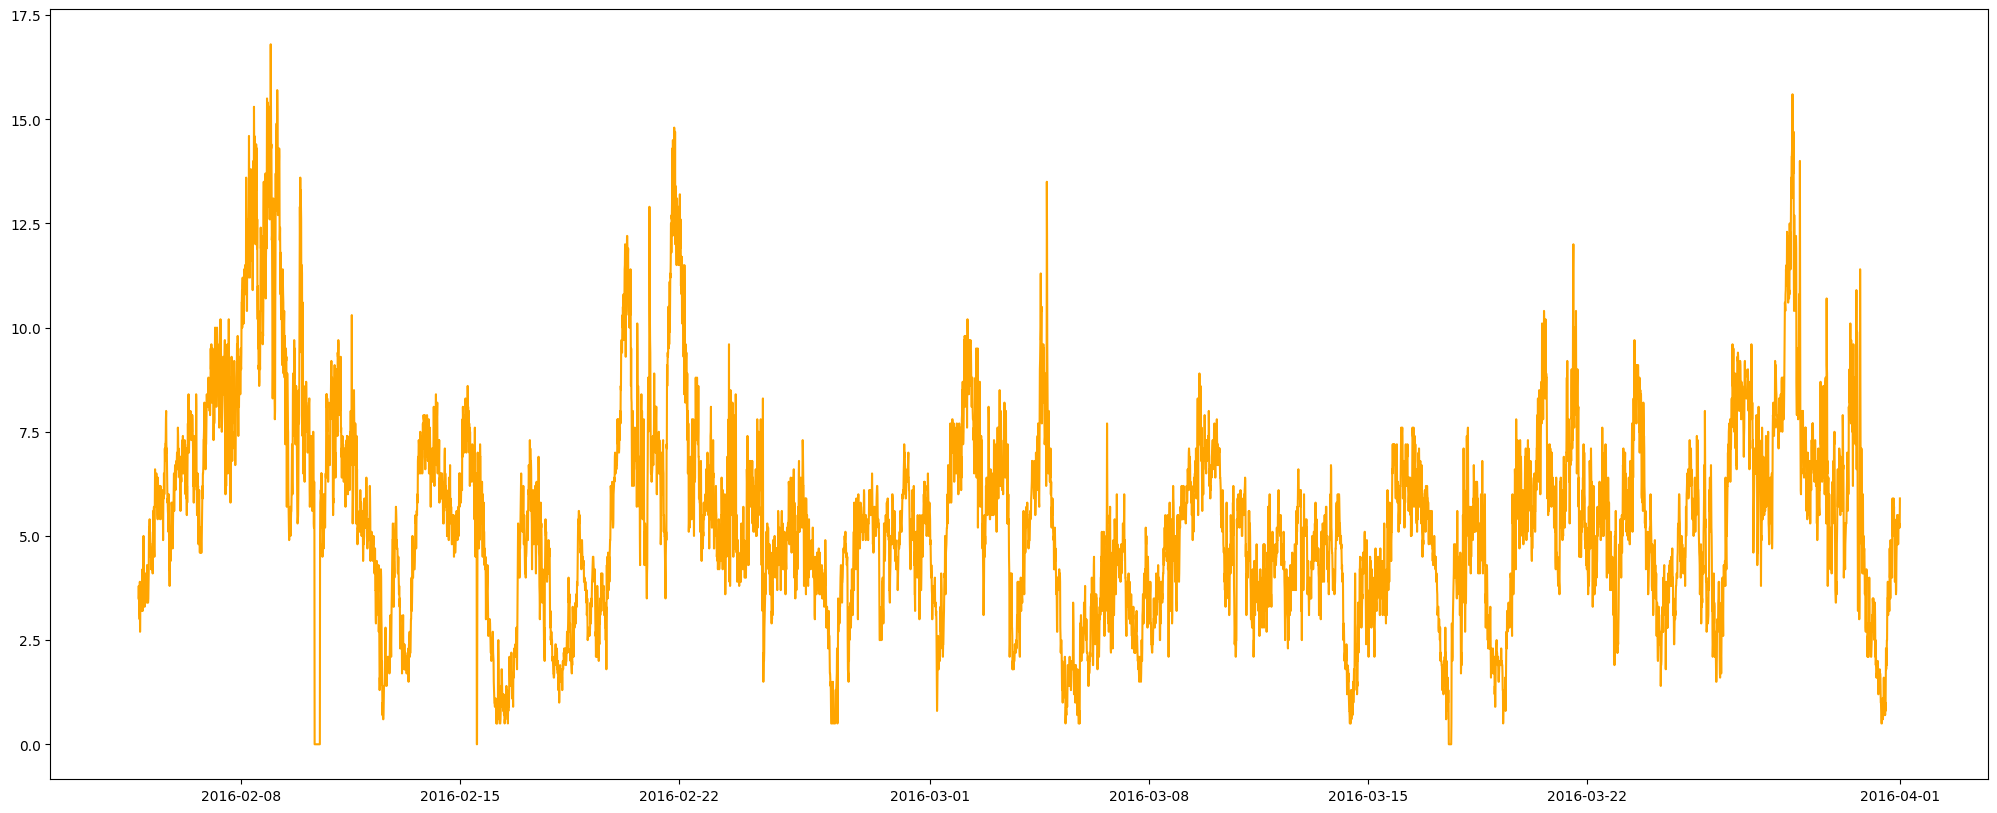

In [491]:
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][5000:], data_new_1["Leistung"][5000:], color="Blue")
plt.show()
plt.figure(figsize=(25,10))
plt.plot(data_new_1["time"][5000:], data_new_1["Wind"][5000:], color="orange")

In [217]:
cols_list = ["Wind","Rotor",  'Azimut', 'Prod. 1', 'Prod. 2', 'BtrStd 1', 'BtrStd 2',  "Gen1-", "Lager", 'Außen', "GetrT", 'CosPh', 'Abgabe', 'Bezug', 'KH-Zähl1', 'KH-Zähl2', 'KH-DigiE','KH-DigiI', 'KH-Ana-1', 'KH-Ana-2', 'KH-Ana-3', "Leistung"]
data_selected = data_new_1[cols_list]

In [16]:
!pip install xgboost

     ---------------------------------------- 99.7/99.7 MB 1.3 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\ridgar1\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [17]:
# import xgboost
# print(xgboost.__version__)
# from xgboost import XGBRegressor
# model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)


2.0.0


## <span style='color:Blue'>  Modelling according to wind only </span>

### Data selection

In [391]:
train_data = data_selected[:int(data_selected.shape[0]*0.9)]
test_data = data_selected[int(data_selected.shape[0]*0.9):]

In [392]:
train_data.shape

(11792, 22)

In [393]:
x_train = train_data.to_numpy()[:, 0].reshape(-1,1)
print(x_train.shape)
y_train = train_data.to_numpy()[:, -1]
print(y_train.shape)

(11792, 1)
(11792,)


In [394]:
## sorting the test data according to wind just for the visualization purposes
test_data = test_data.to_numpy()
test_data = test_data[test_data[:, 0].argsort()]

In [395]:
x_test = test_data[:, 0].reshape(-1,1)
print(x_test.shape)
y_test = test_data[:, -1]
print(y_test.shape)

(1311, 1)
(1311,)


### 1. Linear Regression

In [396]:
reg = LinearRegression().fit(x_train, y_train)

In [397]:
y_pred = reg.predict(x_train)
y_pred.shape

(11792,)

Text(0.5, 1.0, 'Train data predictions')

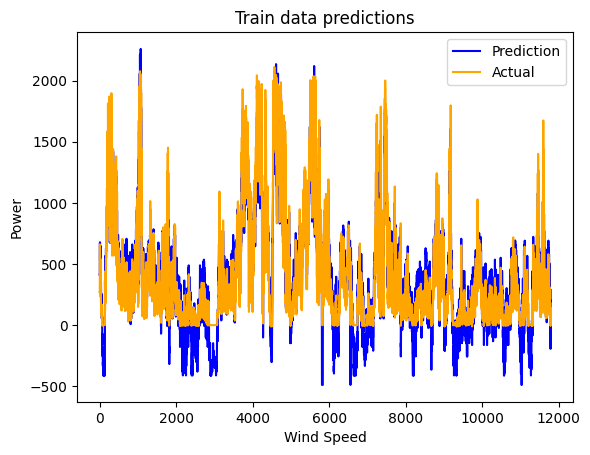

In [398]:
plt.plot(list(range(x_train.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.plot(list(range(x_train.shape[0])), y_train.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Train data predictions")

In [399]:
y_pred = reg.predict(x_test)
y_pred.shape

(1311,)

Text(0.5, 1.0, 'Test data predictions')

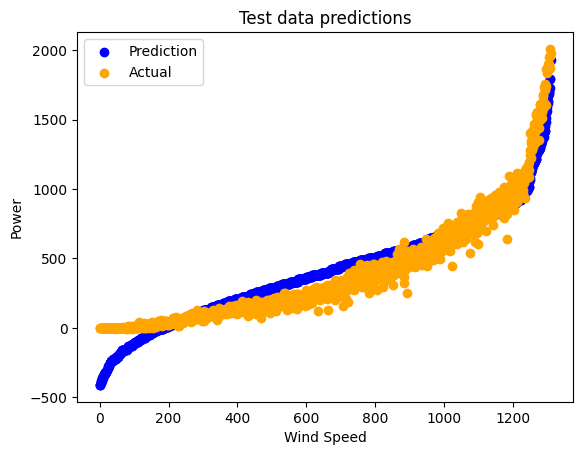

In [400]:
plt.scatter(list(range(x_test.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

In [401]:
print('Training set r2 score: ' + str(reg.score(x_train,y_train)))
print('Test set r2 score: ' + str(reg.score(x_test,y_test)))

Training set r2 score: 0.8952954639524333
Test set r2 score: 0.8982110686449725


### 2. DecisionTree Regressor

In [450]:
pipe = Pipeline([
('scaler', MinMaxScaler()),
('classifier', DecisionTreeRegressor())
])

In [451]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', DecisionTreeRegressor())])

In [452]:
y_pred = pipe.predict(x_test)

Text(0.5, 1.0, 'Test data predictions')

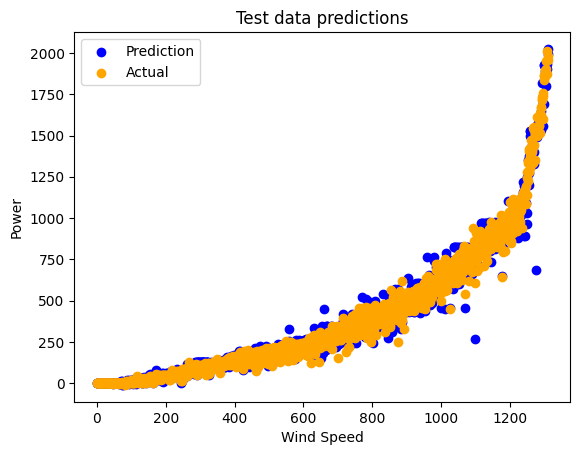

In [453]:
plt.scatter(list(range(x_test.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

In [454]:
print('Training set r2 score: ' + str(pipe.score(x_train,y_train)))
print('Test set r2 score: ' + str(pipe.score(x_test,y_test)))

Training set r2 score: 0.9999999999980613
Test set r2 score: 0.9781715290359144


In [455]:
mean_squared_error(y_test, y_pred, multioutput='uniform_average')

3470.7210450038137

In [456]:
mean_absolute_percentage_error(y_test, y_pred)

36757067896921.85

### 3. RandomForest Regressor

In [457]:
pipe = Pipeline([
('scaler', MinMaxScaler()),
('classifier', RandomForestRegressor(max_depth=4, random_state=0))
])

In [458]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier',
                 RandomForestRegressor(max_depth=4, random_state=0))])

In [459]:
print('Training set r2 score: ' + str(pipe.score(x_train,y_train)))
print('Test set r2 score: ' + str(pipe.score(x_test,y_test)))

Training set r2 score: 0.986700228522571
Test set r2 score: 0.9867766752538321


In [460]:
y_pred = pipe.predict(x_test)

Text(0.5, 1.0, 'Test data predictions')

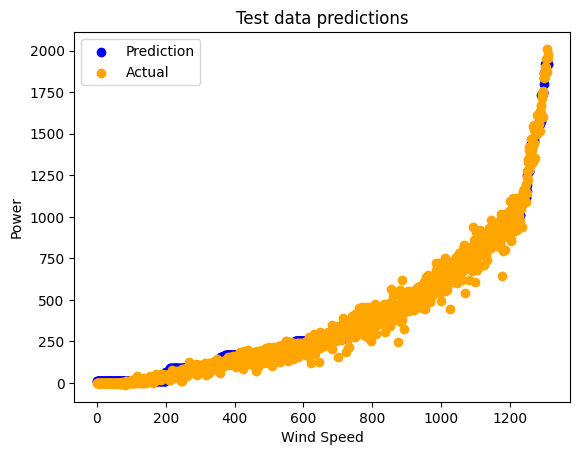

In [461]:
plt.scatter(list(range(x_test.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

## <span style='color:Blue'>  Modelling using Other Sensors Data </span>

In [462]:

x_train = train_data.to_numpy()[:, :-1]
print(x_train.shape)
y_train = train_data.to_numpy()[:, -1]
print(y_train.shape)

# test_data = test_data.to_numpy()

test_data = test_data[test_data[:, 0].argsort()]
x_test = test_data[:, :-1]
print(x_test.shape)
y_test = test_data[:, -1]
print(y_test.shape)

(11792, 21)
(11792,)
(1311, 21)
(1311,)


### 1. Linear regression

In [463]:
reg = LinearRegression().fit(x_train, y_train)

In [464]:
y_pred = reg.predict(x_train)
y_pred.shape

(11792,)

Text(0.5, 1.0, 'Train data predictions')

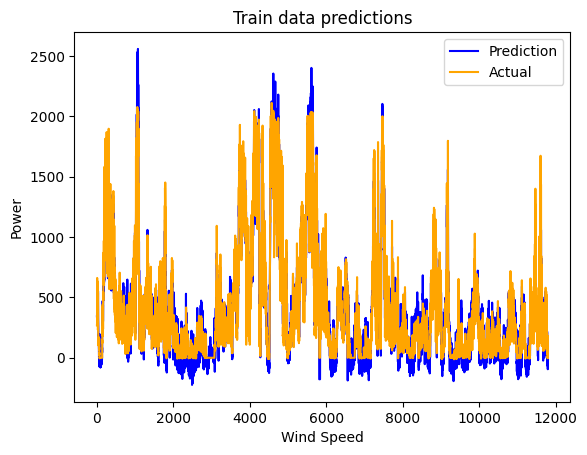

In [465]:
plt.plot(list(range(x_train.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.plot(list(range(x_train.shape[0])), y_train.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Train data predictions")

In [466]:
y_pred = reg.predict(x_test)
y_pred.shape

(1311,)

Text(0.5, 1.0, 'Test data predictions')

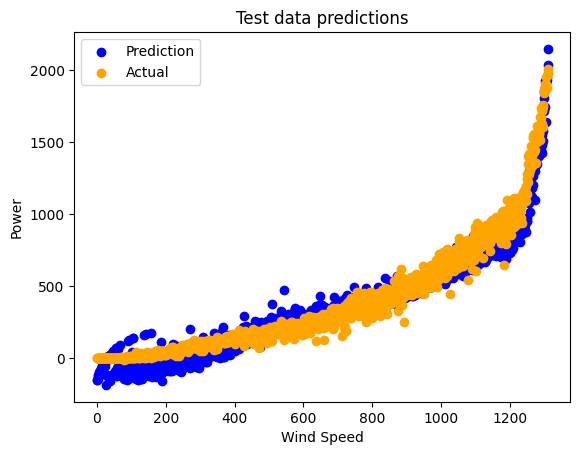

In [467]:
plt.scatter(list(range(x_test.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

In [468]:
print('Training set r2 score: ' + str(reg.score(x_train,y_train)))
print('Test set r2 score: ' + str(reg.score(x_test,y_test)))

Training set r2 score: 0.9594064992927543
Test set r2 score: 0.9343457091648877


### 2. Decision Trree Rgressor

In [476]:
pipe = Pipeline([
('scaler', MinMaxScaler()),
('classifier', DecisionTreeRegressor())
])
# pipe = DecisionTreeRegressor(random_state=0)

In [477]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', DecisionTreeRegressor())])

In [478]:
y_pred = pipe.predict(x_test)

In [479]:
print('Training set r2 score: ' + str(pipe.score(x_train,y_train)))
print('Test set r2 score: ' + str(pipe.score(x_test,y_test)))

Training set r2 score: 0.9999999999980613
Test set r2 score: 0.9804207307047448


Text(0.5, 1.0, 'Test data predictions')

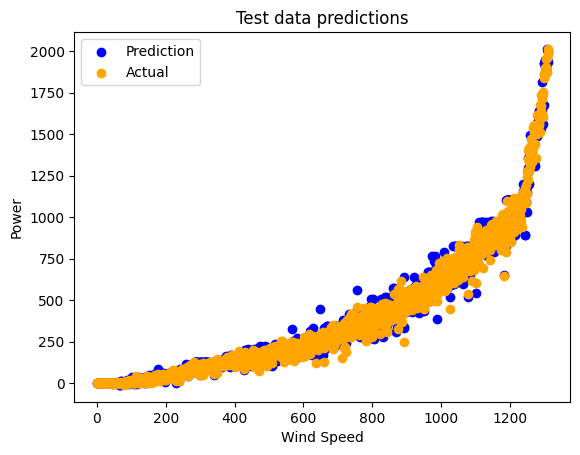

In [480]:
plt.scatter(list(range(x_test.shape[0])), y_pred.reshape(-1,).tolist(), color="blue", label="Prediction")
# plt.show()
plt.scatter(list(range(x_test.shape[0])), y_test.reshape(-1,).tolist(), color="orange", label = "Actual")
plt.xlabel("Wind Speed")
plt.ylabel("Power")
plt.legend()
plt.title("Test data predictions")

## <span style='color:Blue'> Feature Importance </span>

In [481]:
regressor = pipe.steps[1][1]

In [482]:
feature_imp = regressor.feature_importances_

In [483]:
feature_imp

array([9.87218123e-01, 1.31662821e-03, 1.33138514e-03, 5.73664373e-04,
       1.00151227e-04, 4.19589042e-04, 1.43288163e-04, 1.90900530e-03,
       1.95557774e-03, 7.49101283e-04, 6.51209528e-04, 3.55497384e-03,
       5.71747270e-05, 2.01281323e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [484]:
len(cols_list)

22

In [485]:
feature_imp_dict = {}
for idx, e in enumerate(cols_list[:-1]):
       feature_imp_dict[str(e)] = feature_imp[idx]   
       

In [486]:
feature_imp_dict

{'Wind': 0.9872181232967212,
 'Rotor': 0.0013166282052017848,
 'Azimut': 0.0013313851430927048,
 'Prod. 1': 0.0005736643725394709,
 'Prod. 2': 0.00010015122735541416,
 'BtrStd 1': 0.00041958904174459687,
 'BtrStd 2': 0.0001432881631497822,
 'Gen1-': 0.0019090053046317197,
 'Lager': 0.0019555777380191176,
 'Außen': 0.0007491012832752165,
 'GetrT': 0.0006512095276476179,
 'CosPh': 0.0035549738373549323,
 'Abgabe': 5.717472699505367e-05,
 'Bezug': 2.0128132271519564e-05,
 'KH-Zähl1': 0.0,
 'KH-Zähl2': 0.0,
 'KH-DigiE': 0.0,
 'KH-DigiI': 0.0,
 'KH-Ana-1': 0.0,
 'KH-Ana-2': 0.0,
 'KH-Ana-3': 0.0}

In [487]:
feature_imp_dict = sorted(feature_imp_dict.items(), key=lambda x:x[1])

In [488]:
feature_imp_dict

[('KH-Zähl1', 0.0),
 ('KH-Zähl2', 0.0),
 ('KH-DigiE', 0.0),
 ('KH-DigiI', 0.0),
 ('KH-Ana-1', 0.0),
 ('KH-Ana-2', 0.0),
 ('KH-Ana-3', 0.0),
 ('Bezug', 2.0128132271519564e-05),
 ('Abgabe', 5.717472699505367e-05),
 ('Prod. 2', 0.00010015122735541416),
 ('BtrStd 2', 0.0001432881631497822),
 ('BtrStd 1', 0.00041958904174459687),
 ('Prod. 1', 0.0005736643725394709),
 ('GetrT', 0.0006512095276476179),
 ('Außen', 0.0007491012832752165),
 ('Rotor', 0.0013166282052017848),
 ('Azimut', 0.0013313851430927048),
 ('Gen1-', 0.0019090053046317197),
 ('Lager', 0.0019555777380191176),
 ('CosPh', 0.0035549738373549323),
 ('Wind', 0.9872181232967212)]

In [489]:
features = list(zip(*feature_imp_dict))[0]
importance = list(zip(*feature_imp_dict))[1]
x_pos = np.arange(len(features))

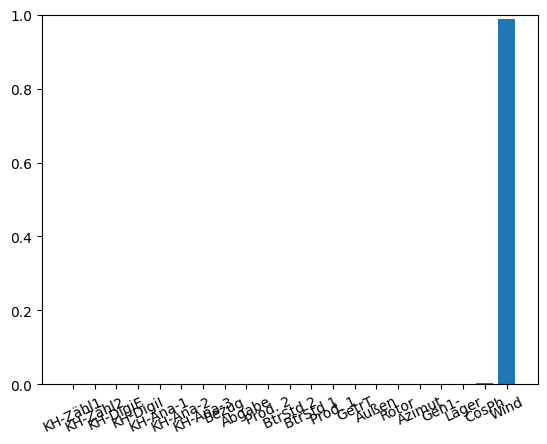

In [490]:
plt.bar(x_pos, importance, align='center')
plt.xticks(x_pos, features, rotation=25) 
plt.ylim(0, 1)
plt.show()